In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
import csv

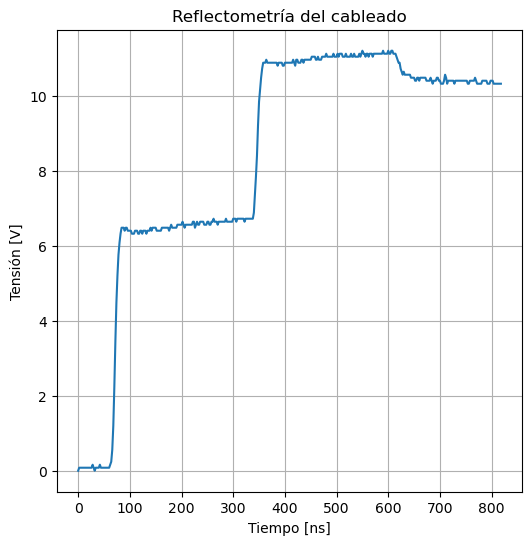

El largo Estimado del cable es l = 35.03[m]
Diferencia del escalón 0.88[V] 
Máximo = 11.20[V] 
Mínimo = 10.32[V]


In [40]:
# Codigo para cargar los datos .CSV almacenados con el osciloscopio LeCroy
def read_lecroy_csv(fname):
    raw_samples = []
    t = []
    with open(fname, 'r') as csvfile:
        c = csv.reader(csvfile)
        # El tiempo esta en la columnda D(3)
        # Las muestras estan en la columna E(4)
        for row_num, row in enumerate(c):
            if row_num >= 2: # Adquiero el periodo de muestreo
                raw_samples.append(float(row[4]))
                t.append(float(row[3]))
    return np.asarray(raw_samples), np.asarray(t)


data,t =read_lecroy_csv('CAB1.CSV')


# Variables
ini = 1890 # Punto de inicio de datos
end = 2300 # Punto final de datos

# Datos de interés
data = data[ini:end]
data -= np.min(data)
# Vector de tiempo [ns]
t = t[ini:end]
t += np.abs(np.min(t))

# Figura
im, ax = plt.subplots(1,figsize=(6,6))
ax.plot(t/1E-9,data)
ax.set_xlabel('Tiempo [ns]')
ax.set_ylabel(r'Tensión [V]')
ax.set_title('Reflectometría del cableado')
ax.grid(True)
plt.show()

# Variables
c0 = 3E8
vp = 0.84 * c0
dt = 278E-9
td = dt/2
l = td * vp
print(r"El largo Estimado del cable es l = {:.02f}[m]".format(l))

# Desadaptación
max = np.max(data)
min = np.min(data[t>700e-9])
print("Diferencia del escalón {:.2f}[V] \nMáximo = {:.2f}[V] \nMínimo = {:.2f}[V]".format(max-min,max,min))





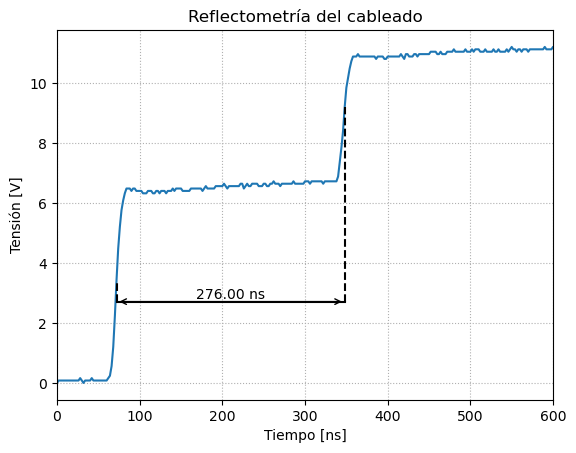

El largo Estimado del cable es l = 35.19[m]
Diferencia del escalón 0.88[V] 
Máximo = 11.20[V] 
Mínimo = 10.32[V]


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Código para cargar los datos .CSV almacenados con el osciloscopio LeCroy
def read_lecroy_csv(fname):
    raw_samples = []
    t = []
    with open(fname, 'r') as csvfile:
        c = csv.reader(csvfile)
        # El tiempo está en la columna D(3)
        # Las muestras están en la columna E(4)
        for row_num, row in enumerate(c):
            if row_num >= 2: # Adquiero el periodo de muestreo
                raw_samples.append(float(row[4]))
                t.append(float(row[3]))
    return np.asarray(raw_samples), np.asarray(t)

# Carga de datos
data, t = read_lecroy_csv('CAB1.CSV')

# Variables
ini = 1890 # Punto de inicio de datos
end = 2300 # Punto final de datos

# Datos de interés
data = data[ini:end]
data -= np.min(data)
# Vector de tiempo [ns]
t = t[ini:end]
t += np.abs(np.min(t))

# Figura
fig, ax = plt.subplots(1)
ax.plot(t / 1E-9, data)
ax.set_xlabel('Tiempo [ns]')
ax.set_ylabel(r'Tensión [V]')
ax.set_title('Reflectometría del cableado')
ax.grid(True,linestyle='dotted')

# Identificar los tiempos de los escalones
t_escalones = [t[36], t[174]]  # Aquí se debe ajustar manualmente o con una función automática para detectar escalones

# Añadir cotas
for i in range(len(t_escalones) - 1):
    t_inicio = t_escalones[i]
    t_fin = t_escalones[i + 1]
    y_pos = np.min(data+0.1) * 27.1  # Ajusta la posición en Y para que esté fuera de los datos
    y_pos_inicio = data[np.where(t == t_inicio)][0]
    y_pos_fin = data[np.where(t == t_fin)][0]
    # Línea horizontal
    ax.plot([t_inicio / 1E-9, t_fin / 1E-9], [y_pos, y_pos], 'k-')

    # Líneas verticales punteadas de la cota a la señal
    ax.plot([t_inicio / 1E-9, t_inicio / 1E-9], [y_pos, y_pos_inicio], 'k--')
    ax.plot([t_fin / 1E-9, t_fin / 1E-9], [y_pos, y_pos_fin], 'k--')
    # Texto
    ax.text((t_inicio + t_fin) / 2 / 1E-9, y_pos, f'{(t_fin - t_inicio) / 1E-9:.2f} ns', 
            ha='center', va='bottom')
    ax.annotate('', xy=(t_inicio / 1E-9, y_pos), xytext=(t_fin / 1E-9, y_pos),
            arrowprops=dict(arrowstyle='<->', color='black'))
    ax.set_xlim((0,600))
plt.show()
fig.savefig('reflectometria.pdf',dpi=300)

# Variables
c0 = 3E8
vp = 0.85 * c0
dt = t_fin - t_inicio
td = dt / 2
l = td*vp
print(r"El largo Estimado del cable es l = {:.02f}[m]".format(l))

# Desadaptación
max_val = np.max(data)
min_val = np.min(data[t > 700e-9])
print("Diferencia del escalón {:.2f}[V] \nMáximo = {:.2f}[V] \nMínimo = {:.2f}[V]".format(max_val - min_val, max_val, min_val))

[-12.66914631]


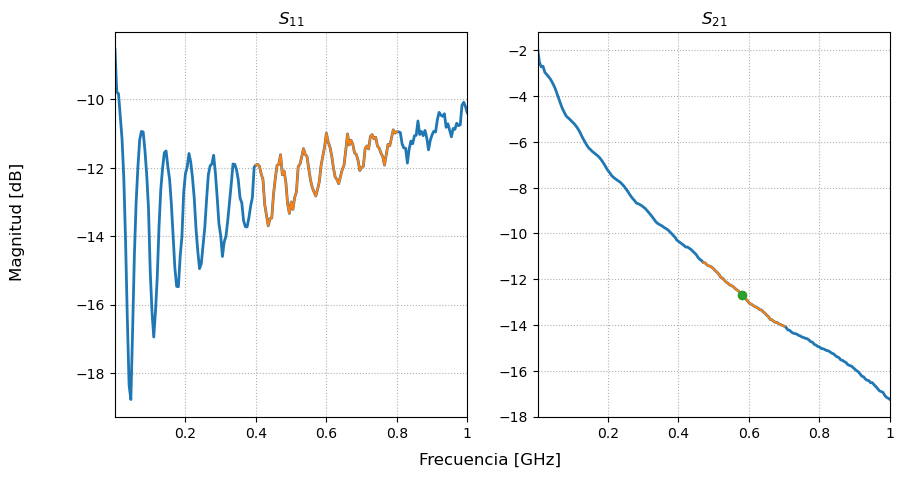

In [2]:
from skrf import Network, Frequency
import matplotlib.pyplot as plt

cable = Network('cablerg6-74.s2p')

im, ax = plt.subplots(1,2,figsize=(10,5))

cable.s11.plot_s_db(lw=2,ax=ax[0],show_legend=False)
cable.s11['400-800mhz'].plot_s_db(lw=1.5,ax=ax[0],show_legend=False)
ax[0].grid(True,linestyle='dotted')
ax[0].set_xlabel('')
ax[0].set_title(r'$S_{11}$')

cable.s12.plot_s_db(lw=2,ax=ax[1],show_legend=False)
cable.s12['470-700mhz'].plot_s_db(lw=1.5, ax=ax[1],show_legend=False)
cable.s12['581.143mhz'].plot_s_db(lw=1, ax=ax[1],marker='o',show_legend=False)
ax[1].grid(True,linestyle='dotted')
ax[1].set_xlabel('')
ax[1].set_title(r'$S_{21}$')
im.supxlabel('Frecuencia [GHz]')
im.supylabel('Magnitud [dB]')

print(20*np.log10(np.abs(cable.s12['581mhz'].s.flatten())))
im.savefig('s-param.pdf',dpi=300)
plt.show()